# <b> <font color='#154d70'> Term Project </font> </b>: <font color='orange'>Deep Neural Networks for Automated XRMI Image log Evaluataion</font>

### <font color='#ce9169'>Introduction</font>
In petroleum engineering, understanding the dip and azimuth direction of layers in subsurface formations is crucial for optimizing many hydrocarbon recovery and production processes. One of the techniques used to acquire this information is analysis of subsurface image logs. However, manually interpreting these images to determine dip and azimuth can be time-consuming and prone to human error.
In this final project, you will develop a deep learning approach to automate the prediction of dip and azimuth of the layering from XRMI image data. By leveraging the power of deep learning algorithms and image processing techniques, you will create a model that can accurately identify and characterize layering orientations in XRMI images, potentially saving significant time and resources in image log analysis.

### <font color='#ce9169'>Project Description</font>

#### <font color='#315d84'> Data Preparation:</font>
> You will receive a set of XRMI data representing image logs by depth.
> Additionally, you will receive an Excel file containing the corresponding dip and azimuth values for some depths, which will serve as the ground truth for training and evaluating your deep learning model.

#### <font color='#315d84'> Data Preprocessing:</font>
> Extract the XRMI images from the files and convert them to a suitable format for the next steps.
> Preprocess the images by applying appropriate techniques such as splitting,  resizing, or normalization to enhance the model's  performance.
> Split the dataset into training, validation, and testing sets.

#### <font color='#315d84'>Deep Learning Model Development:</font>
> Design and implement a deep learning model architecture suitable for image classification or regression tasks, depending on the nature of the dip and azimuth data.
> Explore different convolutional neural network (CNN) architectures, recursive networks, transfer learning techniques, or other deep learning approaches that can effectively capture patterns and features from the XRMI images.
> Train your model using the preprocessed XRMI images and the corresponding dip and azimuth values.

#### <font color='#315d84'>Model Evaluation and Optimization:</font>
> Evaluate the performance of your trained model on the test set using appropriate metrics such as accuracy, precision, recall, or mean squared error, depending on the task (classification or regression).
> Analyze the model's performance and identify areas for improvement, such as adjusting hyperparameters, modifying the model architecture, or incorporating additional data preprocessing techniques.
> Iterate and refine your model until you achieve satisfactory performance.

#### <font color='#315d84'>Deployment and Visualization:</font>
> Implement visualization techniques to display the predicted orientations, enhancing the interpretability of your results. Plot any needed figures to show the performance of your model. 

#### <font color='#315d84'>Documentation and Presentation:</font>
> Document your project thoroughly, including the data preprocessing steps, model architecture, training process, evaluation metrics, and any insights or challenges encountered during the project.
> Prepare a presentation and report to showcase your work.





This project will challenge you to apply your knowledge of deep learning, image processing, and petroleum engineering principles. By completing this project, you will gain valuable experience developing practical solutions for real-world problems and demonstrate your ability to leverage cutting-edge techniques in image log analysis.


In [ ]:
!pip install PyMuPDF

In [6]:
import fitz  # PyMuPDF
import os

# Function to convert PDF to images
def pdf_to_images(pdf_path, output_folder, zoom_x=2.0, zoom_y=2.0):
    pdf_document = fitz.open(pdf_path)
    image_paths = []
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        # Set zoom factors. 2.0 means 200% zoom
        mat = fitz.Matrix(zoom_x, zoom_y)
        pix = page.get_pixmap(matrix=mat)
        image_path = os.path.join(output_folder, f'raw.png')
        pix.save(image_path)
        image_paths.append(image_path)  
    return image_paths

# Paths
pdf_path = 'XRMI_raw_HiRes.pdf'  # Replace with your PDF path
output_folder = 'output_images'
os.makedirs(output_folder, exist_ok=True)

# Convert PDF to images
image_paths = pdf_to_images(pdf_path, output_folder, zoom_x=2.0, zoom_y=2.0)

# Verify conversion
print(f"Converted images saved at: {output_folder}")
for image_path in image_paths:
    print(image_path)


Converted images saved at: output_images
output_images\page_1.png


In [59]:
889 + 141.73

1030.73

In [10]:
from PIL import Image, ImageFile
import os

# Allow PIL to load truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Increase the pixel limit
Image.MAX_IMAGE_PIXELS = None

# Load the image
input_image_path = 'raw.png'
output_folder = 'cropped_images'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

try:
    # Open the image
    image = Image.open(input_image_path)
    image.verify()  # Verify the image to ensure it is not corrupted
    image = Image.open(input_image_path)  # Reopen the image after verification

    # Initial coordinates and step size
    left, top = 214, 747.25
    right, bottom = 889, 1030.73

    step = 141.73
    num_pictures = 1192 * 2
    counter = 0
    # Loop to crop and save images
    for i in range(num_pictures):
        # Define the cropping box
        crop_box = (left, top, right, bottom)
        
        # Crop the image
        cropped_image = image.crop(crop_box)

        # Save the cropped image
        output_image_path = os.path.join(output_folder, f'{counter+26930}.jpg')
        counter += 5

        cropped_image.save(output_image_path)
        
        # Update the coordinates for the next crop
        top += step
        bottom += step

    print(f'Successfully cropped and saved {num_pictures} images to {output_folder}')

except OSError as e:
    print(f'Error: {e}')
except ValueError as ve:
    print(f'Value Error: {ve}')


Successfully cropped and saved 2384 images to cropped_images


select data

In [11]:
import pandas as pd

# Load the CSV file
csv_file_path = 'XRMI_analysis.csv'  # Replace with your CSV file path

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows that are completely empty
df = df.dropna(how='all')

# Display the cleaned DataFrame
df.head(5)


,No.,Depth,type,Dip,Direction
0,1.0,2700.691,20.0,3.74417,111.0390
1,2.0,2710.806,20.0,1.84363,42.7792
2,3.0,2716.606,20.0,1.86042,54.0000
3,4.0,2717.759,20.0,6.64042,357.8960
4,5.0,2717.967,20.0,3.73382,114.7790


In [12]:
df = df[df['Dip'] < 90]
df = df[df['Dip'] > 0]
df = df[df['Direction'] < 360]
df = df[df['Direction'] > 0]
df = df.reset_index()


In [13]:
df

,index,No.,Depth,type,Dip,Direction
0,0,1.0,2700.691,20.0,3.74417,111.0390
1,1,2.0,2710.806,20.0,1.84363,42.7792
2,2,3.0,2716.606,20.0,1.86042,54.0000
3,3,4.0,2717.759,20.0,6.64042,357.8960
4,4,5.0,2717.967,20.0,3.73382,114.7790
...,...,...,...,...,...,...
859,883,866.0,3868.894,20.0,5.63643,63.3507
860,884,867.0,3869.381,20.0,7.20498,67.0909
861,885,868.0,3873.694,20.0,4.19508,70.8312
862,886,869.0,3882.423,20.0,7.44927,37.1688


In [14]:
depth = df.Depth.tolist()

In [15]:
depth = [int(x * 10) for x in depth]

df.Depth = depth
df

,index,No.,Depth,type,Dip,Direction
0,0,1.0,27006,20.0,3.74417,111.0390
1,1,2.0,27108,20.0,1.84363,42.7792
2,2,3.0,27166,20.0,1.86042,54.0000
3,3,4.0,27177,20.0,6.64042,357.8960
4,4,5.0,27179,20.0,3.73382,114.7790
...,...,...,...,...,...,...
859,883,866.0,38688,20.0,5.63643,63.3507
860,884,867.0,38693,20.0,7.20498,67.0909
861,885,868.0,38736,20.0,4.19508,70.8312
862,886,869.0,38824,20.0,7.44927,37.1688


In [16]:

# Create a new column to group by every 50 centimeters
df['group'] = (df['Depth'] // 5) * 5

# Group by the new column and calculate the mean
grouped = df.groupby('group').agg({
    'Depth': 'first',
    'Direction': 'mean',
    'Dip': 'mean'
}).reset_index(drop=True)

# Adjust the depth to represent the midpoint of each group
grouped['Depth'] = grouped['Depth'] // 5 * 5

# Display the result
print(grouped)


     Depth   Direction       Dip
0    27005  111.039000  3.744170
1    27105   42.779200  1.843630
2    27165   54.000000  1.860420
3    27175  236.337500  5.187120
4    27180   13.792213  2.370357
..     ...         ...       ...
635  38685   63.350700  5.636430
636  38690   67.090900  7.204980
637  38735   70.831200  4.195080
638  38820   37.168800  7.449270
639  38825   61.480500  1.847140

[640 rows x 3 columns]


In [17]:
grouped.head(5)


,Depth,Direction,Dip
0,27005,111.039000,3.744170
1,27105,42.779200,1.843630
2,27165,54.000000,1.860420
3,27175,236.337500,5.187120
4,27180,13.792213,2.370357


In [18]:
import os
import shutil

# Source directory containing the images
source_folder = 'cropped_images'  # Replace with the path to your source folder

# Destination folder where the matching images will be copied
destination_folder = 'data'  # Replace with the path to your destination folder

depth = grouped.Depth.tolist()

# List of indexes (as integers)
index_list = depth
# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# List all files in the source folder
all_files = os.listdir(source_folder)

# Iterate over the list of indexes
for index in index_list:
    # Convert the index to a string and add the file extension
    filename = str(index) + '.jpg'
    
    # Check if the file exists in the source folder
    if filename in all_files:
        # Construct the source and destination paths
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        
        # Copy the file to the destination folder
        shutil.copyfile(source_path, destination_path)
        print(f'Copied {filename} to {destination_folder}')
    else:
        print(f'File {filename} not found in {source_folder}')


Copied 27005.jpg to data
Copied 27105.jpg to data
Copied 27165.jpg to data
Copied 27175.jpg to data
Copied 27180.jpg to data
Copied 27205.jpg to data
Copied 27210.jpg to data
Copied 27225.jpg to data
Copied 27230.jpg to data
Copied 27235.jpg to data
Copied 27240.jpg to data
Copied 27245.jpg to data
Copied 27250.jpg to data
Copied 27260.jpg to data
Copied 27265.jpg to data
Copied 27290.jpg to data
Copied 27305.jpg to data
Copied 27340.jpg to data
Copied 27350.jpg to data
Copied 27395.jpg to data
Copied 27405.jpg to data
Copied 27435.jpg to data
Copied 27440.jpg to data
Copied 27445.jpg to data
Copied 27450.jpg to data
Copied 27455.jpg to data
Copied 27465.jpg to data
Copied 27470.jpg to data
Copied 27475.jpg to data
Copied 27485.jpg to data
Copied 27495.jpg to data
Copied 27520.jpg to data
Copied 27525.jpg to data
Copied 27530.jpg to data
Copied 27550.jpg to data
Copied 27570.jpg to data
Copied 27575.jpg to data
Copied 27625.jpg to data
Copied 27630.jpg to data
Copied 27640.jpg to data


In [20]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import backend as K
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the function to load images
def load_images(image_paths, target_size=(128, 128)):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=target_size)
        img = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img)
    return np.array(images)

# Load images from the paths in the dataframe
df2 = grouped.copy()
df2['Depth'] = depth
depths = df2['Depth'].values

df2['Depth'] = df2['Depth'].astype(str)
image_paths = df2['Depth'].apply(lambda x: os.path.join('data', f'{x}.jpg')).tolist()
images = load_images(image_paths)

# Extract the labels
dips = grouped['Dip'].values
directions = grouped['Direction'].values

# Store the original means and stds for denormalization
mean_dip = np.mean(dips)
std_dip = np.std(dips)
mean_direction = np.mean(directions)
std_direction = np.std(directions)

# Combine dips and directions into a single array
labels = np.column_stack((dips, directions))

# Normalize labels
labels[:, 0] = (labels[:, 0] - mean_dip) / std_dip
labels[:, 1] = (labels[:, 1] - mean_direction) / std_direction

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(scheduler)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Custom loss function
def custom_loss(y_true, y_pred):
    dip_loss = K.mean(K.square(y_true[:, 0] - y_pred[:, 0]))
    direction_loss = K.mean(K.square(y_true[:, 1] - y_pred[:, 1]))
    return dip_loss + direction_loss

# Custom metrics
def dip_mse(y_true, y_pred):
    return K.mean(K.square(y_true[:, 0] - y_pred[:, 0]))

def direction_mse(y_true, y_pred):
    return K.mean(K.square(y_true[:, 1] - y_pred[:, 1]))

# Load the pretrained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Define the model
input_layer = Input(shape=(128, 128, 3))
x = base_model(input_layer, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2)(x)  # Output layer for dip and direction

model = Model(inputs=input_layer, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss=custom_loss, metrics=['mae', dip_mse, direction_mse])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler, reduce_lr, early_stopping])




Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 426ms/step - dip_mse: 1.6784 - direction_mse: 1.1099 - loss: 2.7927 - mae: 0.6836 - val_dip_mse: 0.9965 - val_direction_mse: 1.0314 - val_loss: 2.1900 - val_mae: 0.5197 - learning_rate: 1.0000e-04
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - dip_mse: 1.3233 - direction_mse: 1.1484 - loss: 2.4741 - mae: 0.6807 - val_dip_mse: 0.9950 - val_direction_mse: 1.0308 - val_loss: 2.1910 - val_mae: 0.4973 - learning_rate: 1.0000e-04
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step - dip_mse: 1.1289 - direction_mse: 1.1649 - loss: 2.2944 - mae: 0.6256 - val_dip_mse: 1.0056 - val_direction_mse: 1.0316 - val_loss: 2.2016 - val_mae: 0.4659 - learning_rate: 1.0000e-04
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - dip_mse: 0.9634 - direction_mse: 1.1287 - loss: 2.0963 - mae: 0.6127 - val_dip_mse: 0.9951 - val_direction_mse: 1.0345 - val_loss: 2.1968 - val_mae: 0.5056 - learning_rate: 1.0000e-04
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - dip_mse: 0.4675 - direction_mse: 0.8553 - loss: 1.3228 - mae: 0.4333
Test Loss: 2.020190715789795, Test MAE: 0.48791074752807617, Test Dip Loss: 0.9797793626785278, Test Direction Loss: 1.0404114723205566
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step
R2 Score (Train): 0.00047571948523228436
R2 Score (Test): 0.0004370158261878254


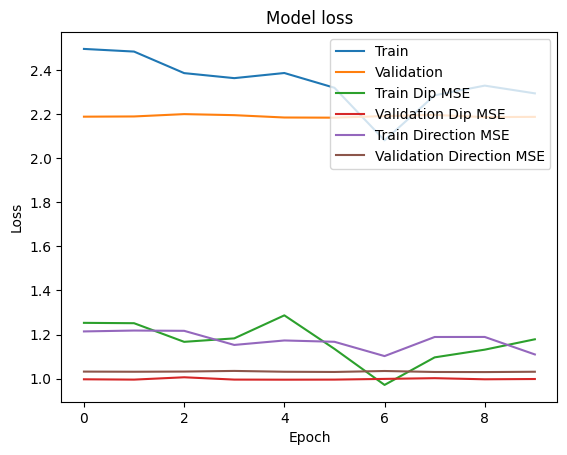

In [21]:
# Evaluate the model
loss, mae, dip_loss, direction_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}, Test Dip Loss: {dip_loss}, Test Direction Loss: {direction_loss}')

# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Denormalize the predictions and actual values
y_test_actual_dip = y_test[:, 0] * std_dip + mean_dip
y_test_predicted_dip = y_test_pred[:, 0] * std_dip + mean_dip
y_test_actual_direction = y_test[:, 1] * std_direction + mean_direction
y_test_predicted_direction = y_test_pred[:, 1] * std_direction + mean_direction

# Calculate R-squared for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score (Train): {r2_train}')
print(f'R2 Score (Test): {r2_test}')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['dip_mse'])
plt.plot(history.history['val_dip_mse'])
plt.plot(history.history['direction_mse'])
plt.plot(history.history['val_direction_mse'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Train Dip MSE', 'Validation Dip MSE', 'Train Direction MSE', 'Validation Direction MSE'], loc='upper right')
plt.show()



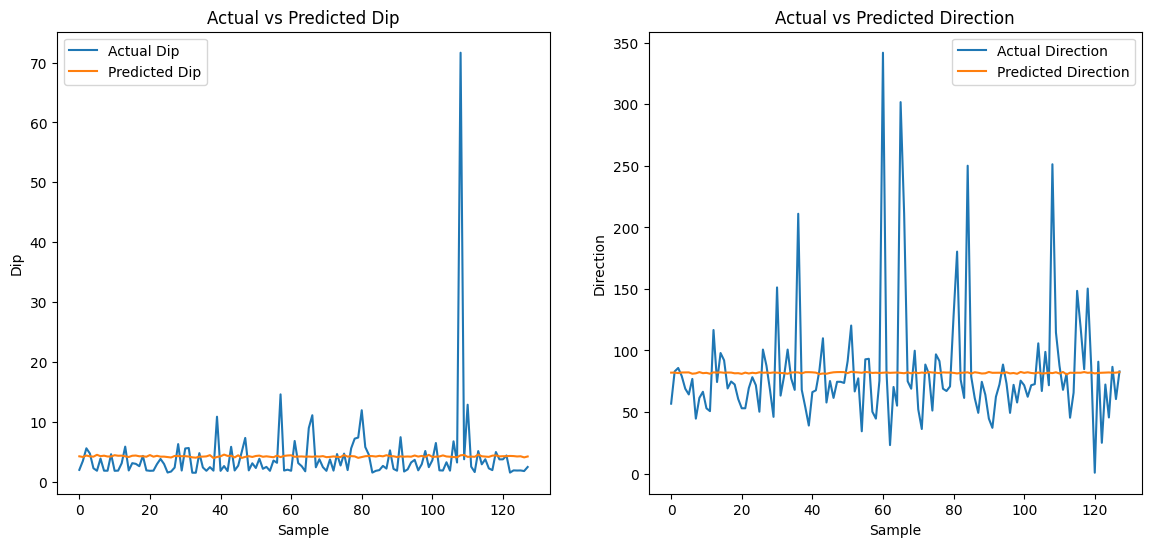

In [22]:
# Plot actual vs predicted values for test set
plt.figure(figsize=(14, 6))

# Line plot for Dip
plt.subplot(1, 2, 1)
plt.plot(y_test_actual_dip, label='Actual Dip')
plt.plot(y_test_predicted_dip, label='Predicted Dip')
plt.xlabel('Sample')
plt.ylabel('Dip')
plt.title('Actual vs Predicted Dip')
plt.legend()

# Line plot for Direction
plt.subplot(1, 2, 2)
plt.plot(y_test_actual_direction, label='Actual Direction')
plt.plot(y_test_predicted_direction, label='Predicted Direction')
plt.xlabel('Sample')
plt.ylabel('Direction')
plt.title('Actual vs Predicted Direction')
plt.legend()

plt.show()